# 主題 : 遷移學習(Transfer learning)

file     : ai_transfer_learning.ipynb

revised   : Ming-Chang Lee

date     : 2025.11.12

YouTube  : https://www.youtube.com/@alan9956

RWEPA    : http://rwepa.blogspot.tw/

GitHub   : https://github.com/rwepa

Email    : alan9956@gmail.com

# 遷移學習

隨著大規模預訓練模型（CNN、Transformer）興起與大型資料集的出現，遷移學習(Transfer learning)從「針對單一任務微調」擴展到「多任務、多模態、零樣本/少樣本」等形式。
+ 遷移學習會將之前任務學習到的知識套用在其他新任務上。
+ 遷移學習是機器學習技術之一。
+ 範例：CLIP（Contrastive Language–Image Pre-training，對比語言—圖片預訓練）以文字監督讓視覺模型具備強遷移能力。

    + clip paper: https://openai.com/index/clip
    + clip source code: https://github.com/openai/CLIP

# 傳統機器學習 vs. 遷移學習比較

1. 概念比較
| 項目        | 傳統機器學習 (Traditional ML)                         | 遷移學習 (Transfer Learning)           |
| --------- | ----------------------------------------------- | ---------------------------------- |
| **核心理念**  | 從零開始訓練一個模型來學習任務                                 | 利用已在相關任務上訓練好的模型，轉移其知識到新任務          |
| **資料需求**  | 需要大量針對該任務的標註資料                                  | 可以在資料量少的新任務上快速適應                   |
| **訓練成本**  | 高（從頭訓練）                                         | 低（只需微調）                            |
| **模型初始化** | 權重隨機初始化                                         | 權重從預訓練模型載入                         |
| **應用場景**  | 資料充分、任務獨立                                       | 資料稀少或任務相關（如圖像、語言等）                 |
| **代表方法**  | SVM、Random Forest、Logistic Regression、CNN（從零訓練） | Fine-tuning BERT、ResNet、GPT、CLIP 等 |

2. 運作流程比較

傳統機器學習：

+ 資料收集 → 特徵工程 → 模型訓練（從零開始） → 評估與部署
+ 資料集1 → 模型1，資料集2 → 模型2，資料集3 → 模型3，...

遷移學習：

+ 流程


預訓練模型（在大型資料上學到一般特徵）

        ↓
轉移到新任務（微調部分或全部層，例：知識 + 資料集2）

        ↓
快速適應目標任務


+ 資料集1 → 模型1(預訓練模型) → (知識 + 資料集2) → 模型2

+ 架構圖

<img src="https://raw.githubusercontent.com/rwepa/propeller_design/refs/heads/main/imgs/transfer_learning.png" width="500">


Keras 引進很多預先訓練好的模型(Keras Applications)，他們都是屬於影像辨識的模型，大都是各屆影像辨識大賽(ILSVRC，ImageNet Large Scale Visual Recognition Competition，2010-2017)的冠亞軍，每個模型層數/參數都很多，均使用超強的伺服器訓練而成的，讓一般使用者可以直接使用模型結構與預訓練完成權重進行辨識。

套用的方式包括：

1. 模型完全採用：可辨識ImageNet提供1000種事物的辨識。
2. 模型部分採用：只擷取特徵，不作辨識。
3. 模型部分採用，並接上自己的input及辨識層：可辨識1000種事物以外的東西。

參考資料：

+ Keras model list: https://keras.io/api/applications/
+ ILSVRC: https://chtseng.wordpress.com/2017/11/20/ilsvrc-歷屆的深度學習模型/
+ Transfer learning source code: https://www.tensorflow.org/hub/tutorials/tf2_image_retraining
+ 陳會安，新一代 Keras 3.x 重磅回歸：跨 TensorFlow 與 PyTorch 建構 Transformer、CNN、RNN、LSTM 深度學習模型，旗標出版社.

# 範例1 預訓練模型的圖片分類預測遷移學習應用(CIFAR-10)

## 目標：

辦識 CIFAR-10 資料集

## 方法：

使用訓練好的模型 MobileNetV2(2018年), paper https://arxiv.org/abs/1801.04381

## 資料集：

1. ImageNet (ILSVRC 2012): 用於分類任務的主要訓練資料集。包含約 120萬張訓練圖片，5萬張驗證圖片。類別數：1000類。用於評估 top-1 與 top-5 準確率。

2. COCO (Common Objects in Context)：用於物件偵測（object detection）與語義分割（segmentation）任務的延伸實驗。

+ Top-1 準確率（Top-1 Accuracy）：模型預測的第一名（機率最高）的類別是否正確。若預測的第一個類別與真實標籤相同，則視為正確。衡量模型「最有信心的預測」是否對。

+ Top-5 準確率（Top-5 Accuracy）：模型預測的前五個類別中，只要有一個與真實標籤相同，就算正確。衡量模型「前幾個最可能的預測」中是否包含正確答案。這在 ImageNet 任務中特別常見，因為類別很多（1000類），有些類別之間非常相似（例如不同品種的狗）。

+ 11個大類別：

| 大類                | 範例                                                                            |
| ----------------- | ----------------------------------------------------------------------------- |
| 🐶 **動物（尤其是哺乳類）** | 各種犬種（如 German shepherd 德國牧羊犬、Chihuahua 吉娃娃、Pomeranian 博美犬）、貓科、馬、牛、象等 |
| 🐦 **鳥類**         | 雀、鴿子、貓頭鷹、企鵝、鴨子等                                                               |
| 🐟 **魚與水生動物**     | 金魚、鯊魚、海星、海龜、章魚等                                                               |
| 🐍 **爬蟲與兩棲類**     | 龜、蛇、蜥蜴、青蛙等                                                                    |
| 🌿 **植物與水果**      | 蘑菇、花朵、樹木、蘋果、香蕉、南瓜等                                                            |
| 🍽️ **食物類**       | 漢堡、比薩、熱狗、冰淇淋、麵包等                                                              |
| 🚗 **交通工具**       | 汽車、卡車、飛機、火車、自行車、船等                                                            |
| 🏠 **建築與場所**      | 教堂、橋樑、燈塔、房屋等                                                                  |
| 👕 **日常用品**       | 電話、筆電、鍵盤、椅子、床、手錶等                                                             |
| 👩‍🦱 **人造物與服飾**  | 鋼筆、吉他、帽子、鞋子、背包等                                                               |
| 🧩 **抽象與符號類**     | 圖騰、棋盤、鐘面、地球儀等                                                                 |


## 理解 CIFAR-10 資料集

CIFAR-10資料集，又稱加拿大高等研究院資料集（Canadian Institute for Advanced Research）是一個常用於訓練機器學習和電腦視覺演算法的圖像集合。 
+ 它是最廣泛使用的機器學習研究資料集之一。
+ CIFAR-10資料集包含60,000張32×32像素的彩色圖像，分為10個不同的類別。
+ 這10個類別分別是飛機0、汽車1、鳥類2、貓3、鹿4、狗5、青蛙6、馬7、船8和卡車8，每個類別有6,000張圖片。
+ CIFAR-10是2008年發布的80 Million Tiny Images資料集的標記子集，該資料集在2009年發表。
+ https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# 載入模組
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 載入 Cifar10 資料集, 如果是第一次載入將先行下載資料集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# 形狀 [長, 寬, RGB]
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)
print("--------------------------")

# 顯示 Numpy 二維陣列內容
print(X_train[0])
print("--------------------------")
X_train[0][0][1][0]
print("--------------------------")
print(y_train[0])   # 標籤資料

X_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
X_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)
--------------------------
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
--------------------------
--------------------------
[6]


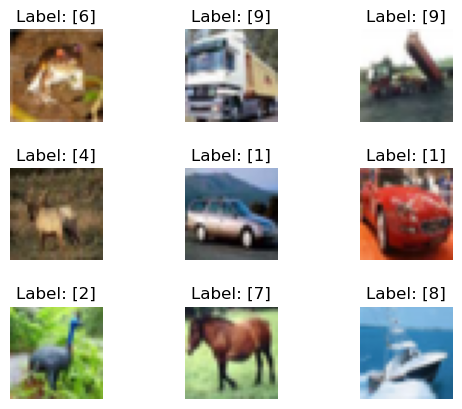

In [4]:
# 繪製前 9 張圖片
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i])
    ax.set_title("Label: " + str(y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
# 顯示數字圖片
plt.show()

## 使用 MobileNetV2 預訓練模型進行圖片分類

In [5]:
# 載入模組
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [6]:
# 載入預訓練模型（ImageNet 權重）
model = MobileNetV2(weights='imagenet', include_top=True)
# include_top: Boolean, whether to include the fully-connected layer at the top of the network. Defaults to True.

In [7]:
# 載入自訂圖片並預處理圖片
img = image.load_img('imgs/koala.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [8]:
# 預測
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [9]:
pred_result = decode_predictions(preds)
flat_data = pred_result[0]
# Convert to DataFrame
df = pd.DataFrame(flat_data, columns=['ID', 'Name', 'Score'])
df.head(n=3) # koala 無尾熊, wombat 袋熊, indri 大狐猴

,ID,Name,Score
0,n01882714,koala,0.873094
1,n01883070,wombat,0.004191
2,n02500267,indri,0.003002


In [10]:
print('預測結果:', df['Name'][0])

預測結果: koala


# 範例2 自行訓練模型的圖片分類預測遷移學習應用(MNIST)

## 目標：

使用 MNIST 數字 5 ~ 9 手寫資料集進行圖片分類預測遷移學習應用

## 方法：

使用自行訓練好辦識數字 0~4 手寫圖片的CNN 模型

In [11]:
import numpy as np
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [12]:
# 指定亂數種子
np.random.seed(7)
# 載入資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
# 建立2個資料集，一個數字小於 5，一個數字大於等於 5
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
X_test_gte5 = X_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [14]:
# 將圖片轉換成 4D 張量
X_train_lt5 = X_train_lt5.reshape(
        (X_train_lt5.shape[0], 28, 28, 1)).astype("float32")
X_test_lt5 = X_test_lt5.reshape(
        (X_test_lt5.shape[0], 28, 28, 1)).astype("float32")
X_train_gte5 = X_train_gte5.reshape(
        (X_train_gte5.shape[0], 28, 28, 1)).astype("float32")
X_test_gte5 = X_test_gte5.reshape(
        (X_test_gte5.shape[0], 28, 28, 1)).astype("float32")

In [15]:
# 執行正規化, 從 0-255 至 0-1
X_train_lt5 = X_train_lt5 / 255
X_test_lt5 = X_test_lt5 / 255
X_train_gte5 = X_train_gte5 / 255
X_test_gte5 = X_test_gte5 / 255

In [16]:
# One-hot編碼
y_train_lt5 = to_categorical(y_train_lt5, 5)
y_test_lt5 = to_categorical(y_test_lt5, 5)
y_train_gte5 = to_categorical(y_train_gte5, 5)
y_test_gte5 = to_categorical(y_test_gte5, 5)

In [17]:
# 定義模型
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(5, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
print("--------------------------")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,853 (54.11 KB)

 Trainable params: 13,853 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

--------------------------


In [18]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [19]:
# 訓練模型
history = model.fit(X_train_lt5, y_train_lt5, validation_split=0.2,
                    epochs=5, batch_size=128, verbose=2)
print("--------------------------")
# 評估模型
loss, accuracy = model.evaluate(X_test_lt5, y_test_lt5, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
print("--------------------------")

Epoch 1/5
192/192 - 4s - 18ms/step - accuracy: 0.8881 - loss: 0.3633 - val_accuracy: 0.9768 - val_loss: 0.0825
Epoch 2/5
192/192 - 3s - 14ms/step - accuracy: 0.9708 - loss: 0.0950 - val_accuracy: 0.9830 - val_loss: 0.0509
Epoch 3/5
192/192 - 2s - 11ms/step - accuracy: 0.9796 - loss: 0.0684 - val_accuracy: 0.9861 - val_loss: 0.0434
Epoch 4/5
192/192 - 1s - 7ms/step - accuracy: 0.9828 - loss: 0.0567 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 5/5
192/192 - 1s - 6ms/step - accuracy: 0.9856 - loss: 0.0484 - val_accuracy: 0.9871 - val_loss: 0.0396
--------------------------
測試資料集的準確度 = 0.99
--------------------------


In [20]:
# 顯示各神經層
print(len(model.layers))
for i in range(len(model.layers)):
    print(i, model.layers[i])
# 凍結上層模型
for i in range(4):
    model.layers[i].trainable = False
print("--------------------------")

8
0 <Conv2D name=conv2d, built=True>
1 <MaxPooling2D name=max_pooling2d, built=True>
2 <Conv2D name=conv2d_1, built=True>
3 <MaxPooling2D name=max_pooling2d_1, built=True>
4 <Flatten name=flatten, built=True>
5 <Dense name=dense, built=True>
6 <Dropout name=dropout, built=True>
7 <Dense name=dense_1, built=True>
--------------------------


In [21]:
# 編譯模型
model.compile(loss="categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])    
# 訓練模型
history = model.fit(X_train_gte5, y_train_gte5, validation_split=0.2,
                    epochs=5, batch_size=128, verbose=2)
print("--------------------------")

Epoch 1/5
184/184 - 3s - 16ms/step - accuracy: 0.8059 - loss: 0.5962 - val_accuracy: 0.9417 - val_loss: 0.1978
Epoch 2/5
184/184 - 2s - 12ms/step - accuracy: 0.9285 - loss: 0.2246 - val_accuracy: 0.9599 - val_loss: 0.1323
Epoch 3/5
184/184 - 1s - 7ms/step - accuracy: 0.9506 - loss: 0.1613 - val_accuracy: 0.9687 - val_loss: 0.1027
Epoch 4/5
184/184 - 1s - 7ms/step - accuracy: 0.9583 - loss: 0.1348 - val_accuracy: 0.9713 - val_loss: 0.0906
Epoch 5/5
184/184 - 1s - 7ms/step - accuracy: 0.9609 - loss: 0.1246 - val_accuracy: 0.9740 - val_loss: 0.0818
--------------------------


In [22]:
# 評估模型
loss, accuracy = model.evaluate(X_test_gte5, y_test_gte5, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

測試資料集的準確度 = 0.98


<div class="alert alert-block alert-success">
    <b>未完：</b> 參考 streamlit 教學，將 Python 程式以 Streamlit 互動式視覺化呈現 ~ 謝謝各位訂閱、按讚、分享與開啟小鈴鐺💡】
    </div>

+ YouTube (包括中文字幕)：https://youtu.be/-_zghs2qrIg
+ LINK: https://rwepa.blogspot.com/2023/08/visualization-climbing-routes-with.html

In [23]:
# end